# Loading Libraries


In [1]:
# To ignore the imports warning
import warnings
warnings.filterwarnings("ignore")
# For the dataset loading 
import pandas as pd
# for arrays manupulation
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For making train and test data 
from sklearn.model_selection import train_test_split
# For scaling the dataset 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Importing the machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
# Functions to import the model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn.neural_network import MLPRegressor

Loading Datasets


In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\mmda\4\Flood_report_rain_random_no_rain_650.csv')
df.dropna(inplace=True)
df.head()

,FLOOD_HEIGHT,RAINFALL,TMAX,TMIN,TMEAN,WIND_SPEED,WIND_DIRECTION,ELEVATION,SLOPE
0,8.0,6.0,35.0,26.4,30.7,2.0,270,2.024,0.738
1,8.0,15.0,34.3,25.6,30.0,1.0,320,33.112,0.251
2,8.0,9.9,34.4,24.4,29.4,1.0,160,51.210,2.284
3,5.0,9.9,34.4,24.4,29.4,1.0,160,41.147,0.706
4,10.0,46.8,35.0,25.3,30.2,1.0,220,4.976,1.611


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FLOOD_HEIGHT    2803 non-null   float64
 1   RAINFALL        2803 non-null   float64
 2   TMAX            2803 non-null   float64
 3   TMIN            2803 non-null   float64
 4   TMEAN           2803 non-null   float64
 5   WIND_SPEED      2803 non-null   float64
 6   WIND_DIRECTION  2803 non-null   int64  
 7   ELEVATION       2803 non-null   float64
 8   SLOPE           2803 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 197.2 KB


Visualizing data using Matplotlib and Seaborn



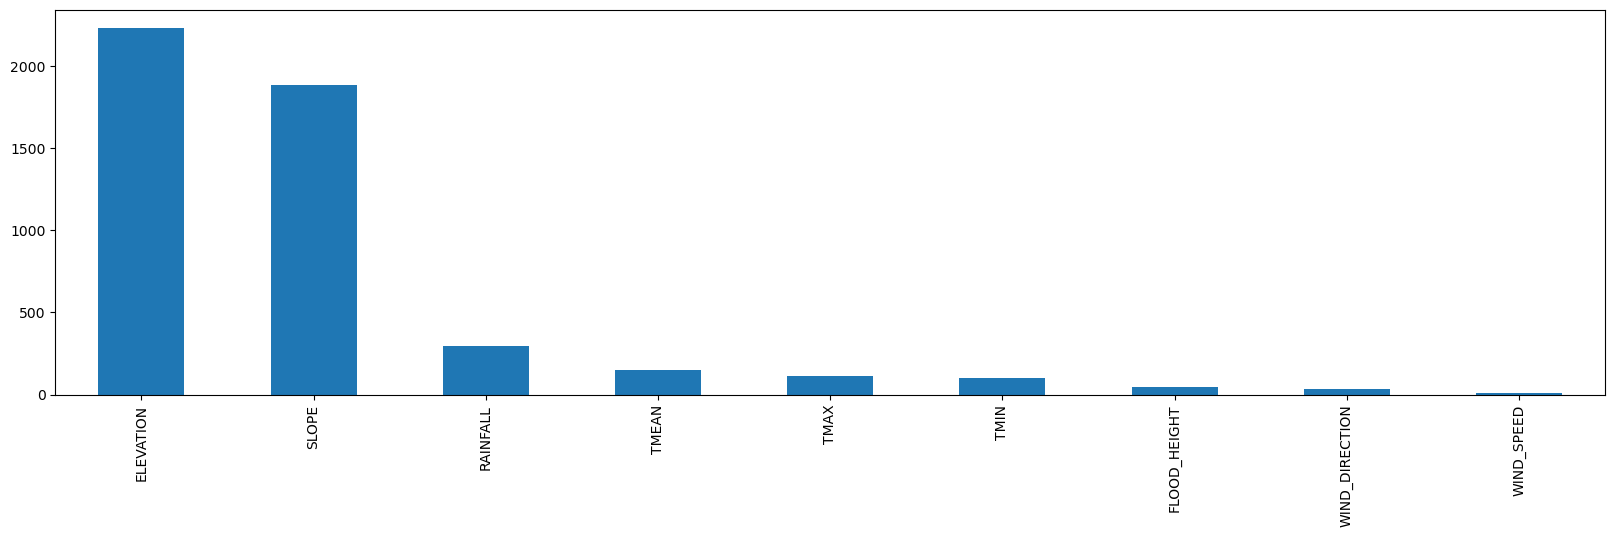

In [4]:
plt.figure(figsize=(20,5))
df.nunique().sort_values(ascending=False).plot(kind='bar');

In [5]:
df.columns

Index(['FLOOD_HEIGHT', 'RAINFALL', 'TMAX', 'TMIN', 'TMEAN', 'WIND_SPEED',
       'WIND_DIRECTION', 'ELEVATION', 'SLOPE'],
      dtype='object')

Countplot of duration

Relation Between Various Factors

In [6]:
# get the unique values of each column
df.nunique()


FLOOD_HEIGHT        47
RAINFALL           297
TMAX               110
TMIN                99
TMEAN              149
WIND_SPEED          12
WIND_DIRECTION      36
ELEVATION         2233
SLOPE             1883
dtype: int64

The data types associated with the columns are:

Correlation Of All Atributes in DataFrame


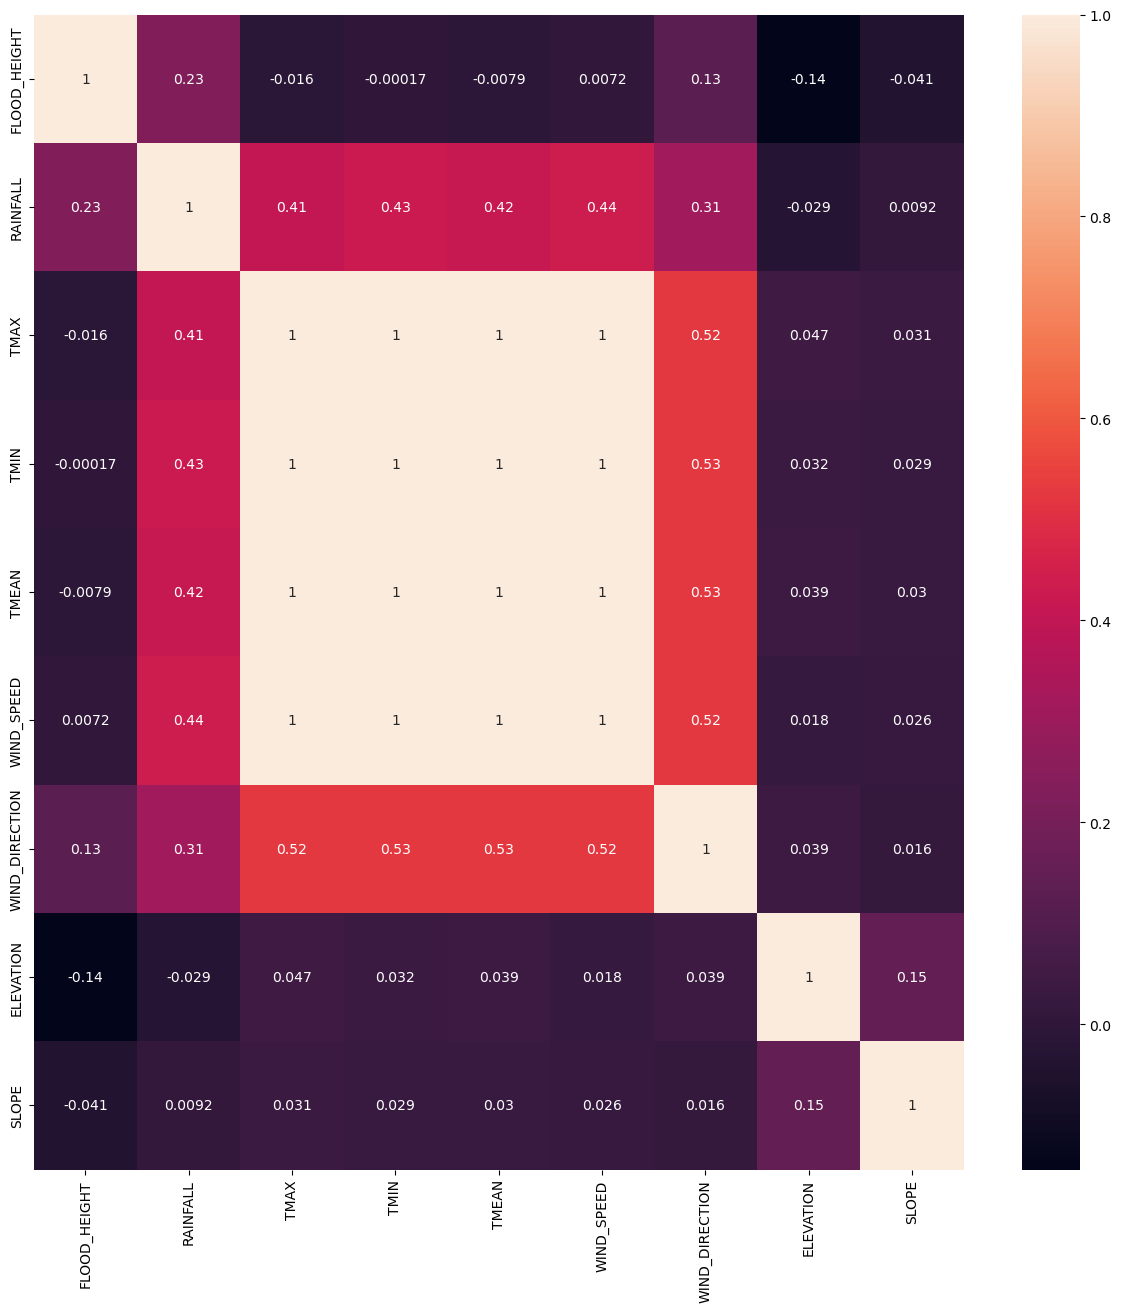

In [7]:

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True);


# Data Preprocessing
Drop Useless Column In Dataframe


In [8]:
df.columns

Index(['FLOOD_HEIGHT', 'RAINFALL', 'TMAX', 'TMIN', 'TMEAN', 'WIND_SPEED',
       'WIND_DIRECTION', 'ELEVATION', 'SLOPE'],
      dtype='object')

In [9]:
df.shape

(2803, 9)

In [10]:
df.dtypes

FLOOD_HEIGHT      float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND_SPEED        float64
WIND_DIRECTION      int64
ELEVATION         float64
SLOPE             float64
dtype: object

Text(0.5, 1.0, 'Relation Between flood height and precipitation')

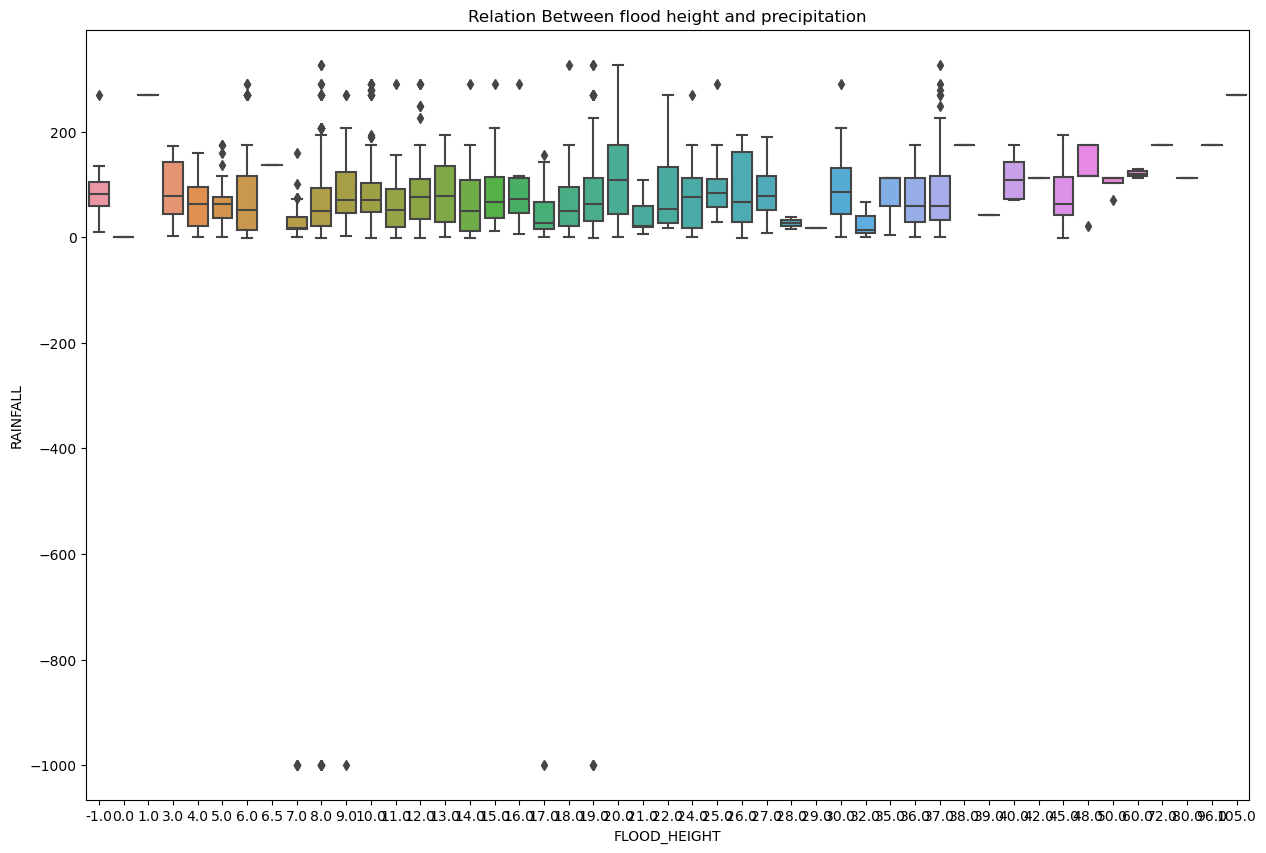

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.boxplot(x=df['FLOOD_HEIGHT'],y=df['RAINFALL'],data=df)
plt.title('Relation Between flood height and precipitation')

Seprate Data Into Feature(x) and Labels(y)

In [12]:
X = df.drop(['FLOOD_HEIGHT'], axis=1)
y= df['FLOOD_HEIGHT']

In [13]:
X

,RAINFALL,TMAX,TMIN,TMEAN,WIND_SPEED,WIND_DIRECTION,ELEVATION,SLOPE
0,6.0,35.0,26.4,30.70,2.0,270,2.024,0.738
1,15.0,34.3,25.6,30.00,1.0,320,33.112,0.251
2,9.9,34.4,24.4,29.40,1.0,160,51.210,2.284
3,9.9,34.4,24.4,29.40,1.0,160,41.147,0.706
4,46.8,35.0,25.3,30.20,1.0,220,4.976,1.611
...,...,...,...,...,...,...,...,...
2798,0.0,29.4,25.0,27.20,2.0,220,-0.136,1.864
2799,0.0,30.1,22.6,26.35,3.0,40,1.218,0.925
2800,0.0,35.3,25.2,30.25,2.0,340,1.437,2.235
2801,0.0,30.8,25.9,28.35,2.0,90,1.627,1.044


In [14]:
# train test split 
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.1,random_state=0)


Apply Standard Scaler On Traning Part Of Data Set


In [15]:
# scaling
std = StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)


# Applying Regression Models


In [16]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# Applying Naive Bayes, Random Forest and Support Vector Machines


In [17]:
# For Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=1400, min_samples_split= 5, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 80, bootstrap = True)
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

# For ANN Regressor
ANN_model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='logistic', solver='lbfgs', random_state=50)
ANN_model.fit(x_train, y_train)
pred_ANN = ANN_model.predict(x_test)

# For SVM Regression
SVR_model = SVR(C=1000) 
SVR_model.fit(x_train, y_train)
pred_SVR = SVR_model.predict(x_test)



In [18]:
# function for evaluation metrics 
def modelcrossvalidation(scores):
    results = [plt.plot(range(1, 11), scores, 'o-'), plt.xlabel('Fold'), plt.ylabel('Score'), plt.title('Cross-validation results'), plt.show()]
    return results

Mean Squared Error: 57.374636037490376


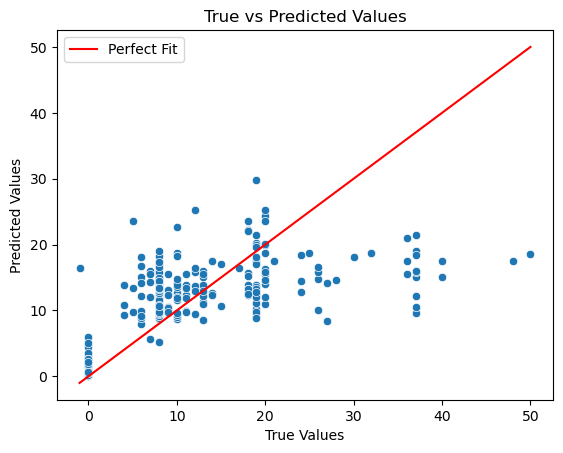

Mean Squared Error: 66.86727865617264


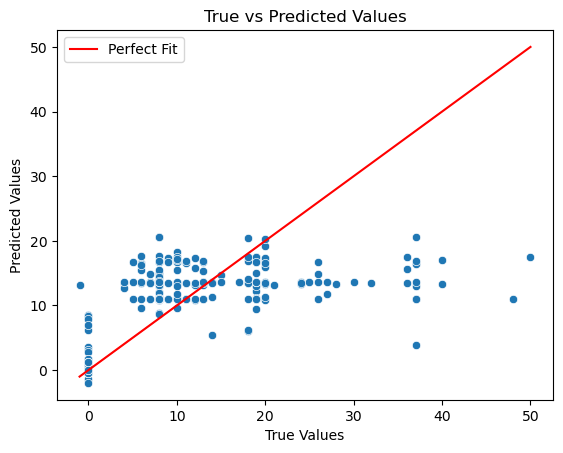

Mean Squared Error: 77.70091338445619


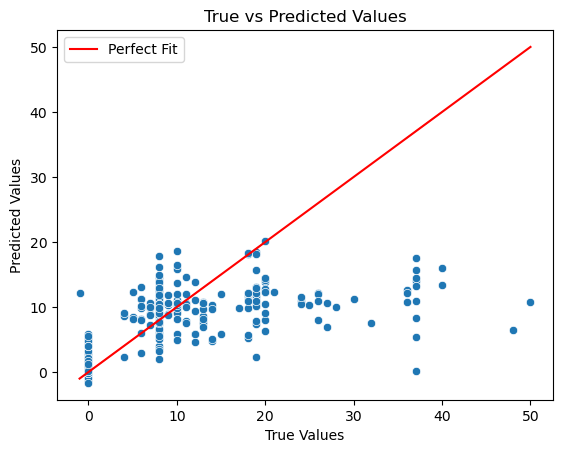

In [19]:
# For Random Forest Regression
rf_mse = mean_squared_error(y_test, pred_rf)
print("Mean Squared Error:", rf_mse)
sns.scatterplot(x=y_test, y=pred_rf)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

# For Artificial Neural Network Regression
ANN_mse = mean_squared_error(y_test, pred_ANN)
print("Mean Squared Error:", ANN_mse)
sns.scatterplot(x=y_test, y=pred_ANN)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
# For Support Vector Machines Regression
SVR_mse = mean_squared_error(y_test, pred_SVR)
print("Mean Squared Error:", SVR_mse)
sns.scatterplot(x=y_test, y=pred_SVR)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

==========Random Forest==========
Score: [0.42180683 0.41682058 0.39102998 0.43005896 0.39690453 0.39649336
 0.38944849 0.3940272  0.3106666  0.37526992]
Average accuracy: 0.3922526451653
Standard deviation: 0.031469315331291874


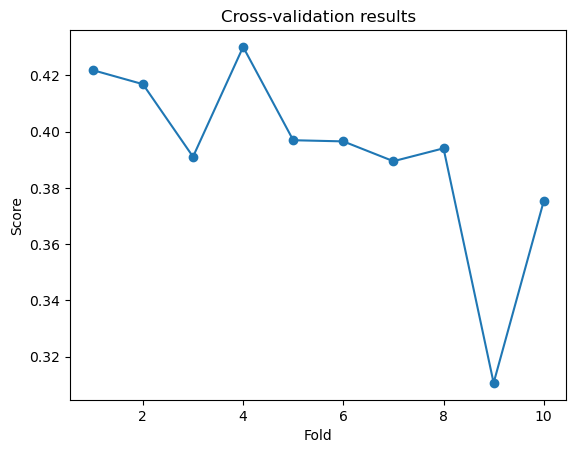

==========Artificial Neural Network==========
Score: [0.30537428 0.28487392 0.22759155 0.32279821 0.31149462 0.3326757
 0.24338033 0.31790746 0.17809631 0.2757788 ]
Average accuracy: 0.2799971179393004
Standard deviation: 0.04710917014060889


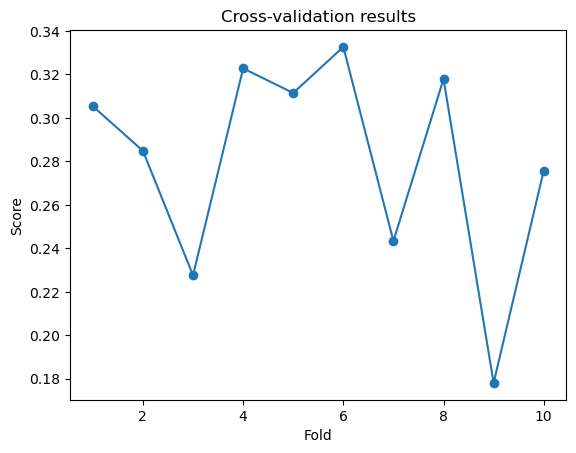

==========Support Vector Machines==========
Score: [0.18894048 0.1612966  0.14167813 0.2427616  0.18712104 0.19177061
 0.26969491 0.17394593 0.09038402 0.16039374]
Average accuracy: 0.18079870816313942
Standard deviation: 0.047452574524122174


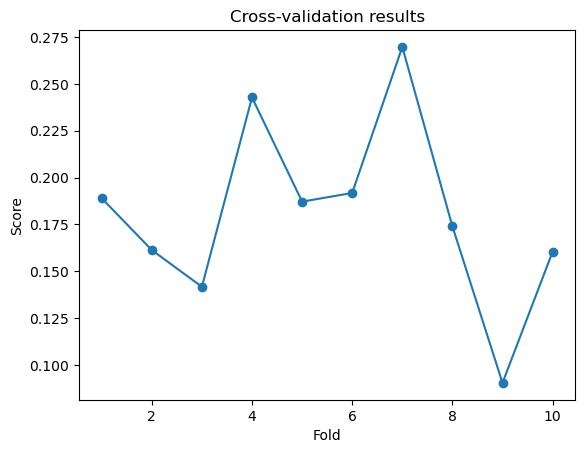

[[<matplotlib.lines.Line2D at 0x1cb00cf79a0>],
 Text(0.5, 24.0, 'Fold'),
 Text(24.0, 0.5, 'Score'),
 Text(0.5, 1.0, 'Cross-validation results'),
 None]

In [20]:
# For Random Forest Regression
print("==========Random Forest==========")
rfscores = cross_val_score(rf_model, x_train, y_train, cv=10)
print("Score:", rfscores)
print("Average accuracy:", rfscores.mean())
print("Standard deviation:", rfscores.std())
modelcrossvalidation(rfscores)
# For Artificial Neural Network Regression
print("==========Artificial Neural Network==========")
ANNscores = cross_val_score(ANN_model, x_train, y_train, cv=10)
print("Score:", ANNscores)
print("Average accuracy:", ANNscores.mean())
print("Standard deviation:", ANNscores.std())
modelcrossvalidation(ANNscores)
# For Support Vector Machines Regression
print("==========Support Vector Machines==========")
SVRscores = cross_val_score(SVR_model, x_train, y_train, cv=10)
print("Score:", SVRscores)
print("Average accuracy:", SVRscores.mean())
print("Standard deviation:", SVRscores.std())
modelcrossvalidation(SVRscores)

# Comparsion Between Artificial Neural Network, Random Forest and Support Vector Machines

In [21]:

# showing cross-validation
dic2 = {
 'Metrics':['mean', 'standard deviation'],
 'Random Forest' : (rfscores.mean(), rfscores.std()),
 'Artificial Neural Network': (ANNscores.mean(), ANNscores.std()),
 'Support Vector Machines': (SVRscores.mean(), SVRscores.std()),
}
metrics_df2 = pd.DataFrame(dic2)
metrics_df2 = metrics_df2.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df2, headers = 'keys', tablefmt = 'psql'))

+--------------------+-----------------+-----------------------------+---------------------------+
| Metrics            |   Random Forest |   Artificial Neural Network |   Support Vector Machines |
|--------------------+-----------------+-----------------------------+---------------------------|
| mean               |       0.392253  |                   0.279997  |                 0.180799  |
| standard deviation |       0.0314693 |                   0.0471092 |                 0.0474526 |
+--------------------+-----------------+-----------------------------+---------------------------+


In [22]:
# showing Mean Squared Error
dic1 = {
 'Metrics':['Mean Squared Error'],
 'Random Forest' : (rf_mse),
 'Artificial Neural Network': (ANN_mse),
 'Support Vector Machines': (SVR_mse),
}
metrics_df1 = pd.DataFrame(dic1)
metrics_df1 = metrics_df1.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1, headers = 'keys', tablefmt = 'psql'))

+--------------------+-----------------+-----------------------------+---------------------------+
| Metrics            |   Random Forest |   Artificial Neural Network |   Support Vector Machines |
|--------------------+-----------------+-----------------------------+---------------------------|
| Mean Squared Error |         57.3746 |                     66.8673 |                   77.7009 |
+--------------------+-----------------+-----------------------------+---------------------------+


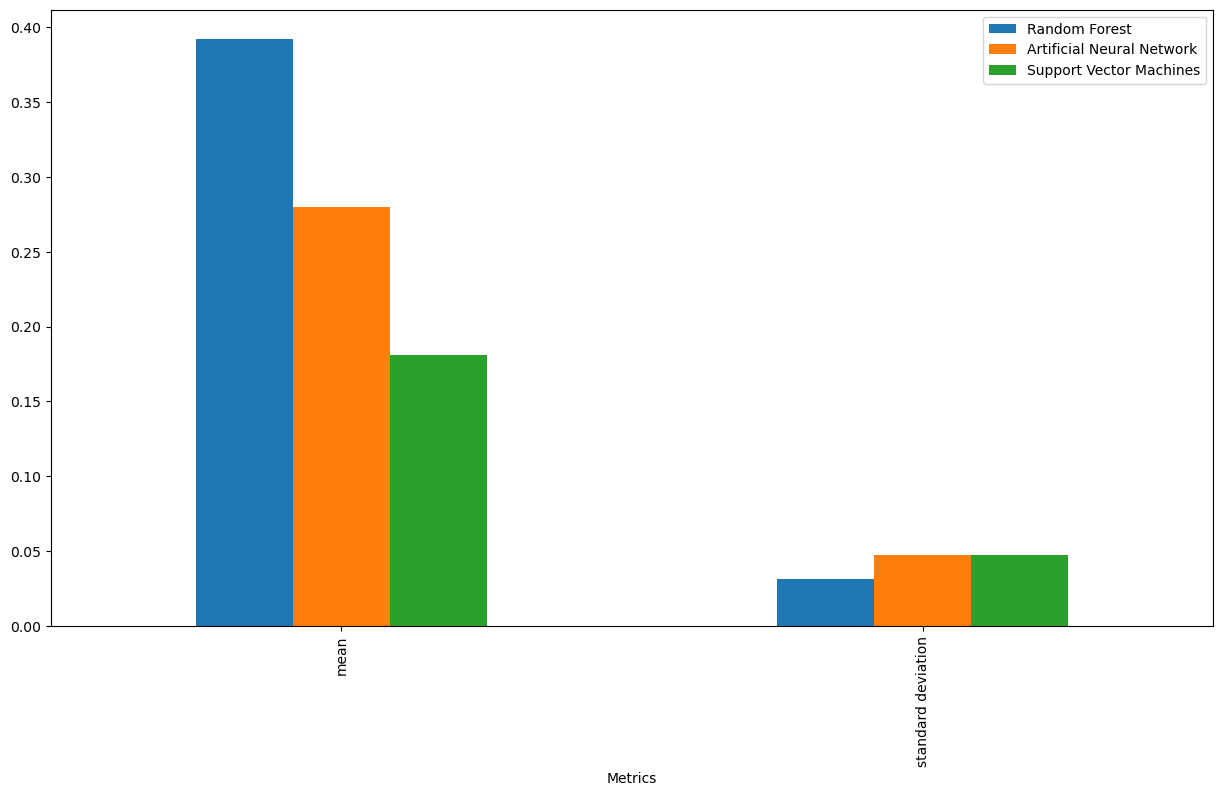

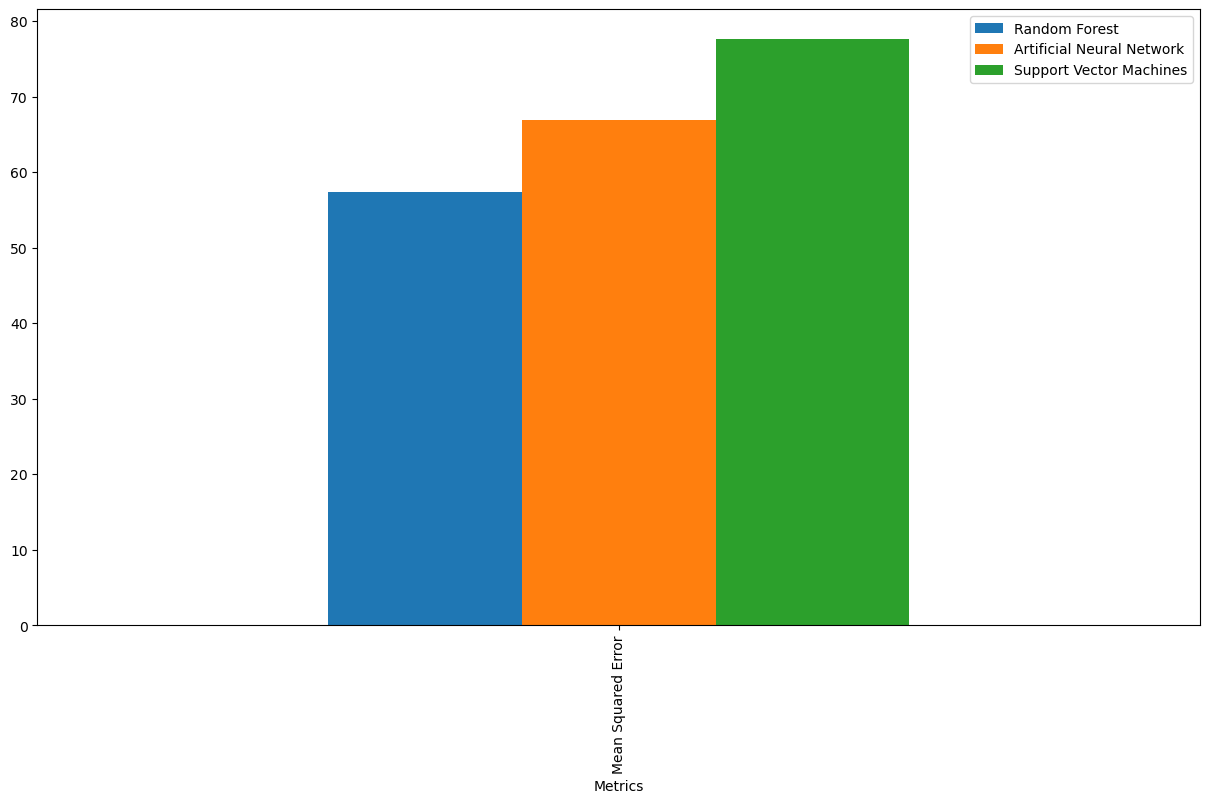

In [23]:
# Evluations comparisons graph
metrics_df2.plot(kind='bar', figsize=(15,8))
plt.show()
metrics_df1.plot(kind='bar', figsize=(15,8))
plt.show()